In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mloey1/ahcd1")


# *italicised text*{"username":"xxxx",

"key":"xxxxxxxxxxxxxxxx"}

In [ ]:
od.download("https://www.kaggle.com/datasets/mloey1/ahdd1")

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
from PIL import Image


In [ ]:
pre_fix = "/kaggle/input/"

In [ ]:
x_train = pd.read_csv(pre_fix + "ahcd1/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv(pre_fix + "ahcd1/csvTrainLabel 13440x1.csv",header=None)

x_test_val = pd.read_csv(pre_fix + "ahcd1/csvTestImages 3360x1024.csv",header=None)
y_test_val = pd.read_csv(pre_fix + "ahcd1/csvTestLabel 3360x1.csv",header=None)

In [ ]:
x_train = x_train.iloc[:,:].values
x_test_val = x_test_val.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test_val = y_test_val.iloc[:,:].values

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32)
x_test_val = x_test_val.reshape(x_test_val.shape[0],32,32)

In [ ]:
x_train_temp = np.zeros((x_train.shape[0],32,32))
x_test_val_temp = np.zeros((x_test_val.shape[0],32,32))

In [ ]:
for i in range(x_train.shape[0]):
    #x_train_temp[i] = cv2.resize(x_train[i].astype(float), (28, 28))
    x_train_temp[i] = np.transpose(x_train[i])
for i in range(x_test_val.shape[0]):
    #x_test_val_temp[i] = cv2.resize(x_test_val[i].astype(float), (28, 28))
    x_test_val_temp[i] = np.transpose(x_test_val[i])


In [ ]:
x_train = x_train_temp
x_test_val = x_test_val_temp

In [ ]:
y_test = np.array([])
x_test=np.array([])
y_val=np.array([])
x_val=np.array([])

In [ ]:
randomize = np.arange(len(y_test_val))
np.random.shuffle(randomize)
x_test_val = x_test_val[randomize]
y_test_val = y_test_val[randomize]

In [ ]:
for i in range(28):
  labels = np.where(y_test_val==i+1)[0]
  if(len(y_test) == 0):
    y_test = y_test_val[labels[:60]]
    x_test = x_test_val[labels[:60]]
    y_val = y_test_val[labels[60:]]
    x_val = x_test_val[labels[60:]]
  else:
    y_test = np.concatenate((y_test,y_test_val[labels[:60]]))
    x_test = np.concatenate((x_test,x_test_val[labels[:60]]))
    y_val = np.concatenate((y_val,y_test_val[labels[60:]]))
    x_val = np.concatenate((x_val,x_test_val[labels[60:]]))

x_test_val=[]
y_test_val=[]


In [ ]:
train_len = y_train.shape[0]
val_len = y_val.shape[0]

In [ ]:
for i in range(10):
  y_train = np.concatenate((y_train,y_train[0:train_len]))
  x_train = np.concatenate((x_train,x_train[0:train_len]))
  y_val = np.concatenate((y_val,y_val[0:val_len]))
  x_val = np.concatenate((x_val,x_val[0:val_len]))

In [ ]:
x_train_val_digits = pd.read_csv(pre_fix + "ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv")
y_train_val_digits = pd.read_csv(pre_fix + "ahdd1/csvTrainLabel 60k x 1.csv")
x_test_digits = pd.read_csv(pre_fix + "ahdd1/csvTestImages 10k x 784.csv")
y_test_digits = pd.read_csv(pre_fix + "ahdd1/csvTestLabel 10k x 1.csv")
print(x_train_val_digits.shape)
print(y_train_val_digits.shape)
print(x_test_digits.shape)
print(y_test_digits.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


In [ ]:
x_train_val_digits = x_train_val_digits.iloc[:,:].values
x_test_digits = x_test_digits.iloc[:,:].values
y_train_val_digits = y_train_val_digits.iloc[:,:].values
y_test_digits = y_test_digits.iloc[:,:].values

In [ ]:
x_train_val_digits = x_train_val_digits.reshape(x_train_val_digits.shape[0],28,28)
x_test_digits = x_test_digits.reshape(x_test_digits.shape[0],28,28)

In [ ]:
----for i in range(x_train_val_digits.shape[0]):
    x_train_val_digits[i] = np.transpose(x_train_val_digits[i])
for i in range(x_test_digits.shape[0]):
    x_test_digits[i] = np.transpose(x_test_digits[i])

In [ ]:
temp_x_train_val_digits = np.zeros((x_train_val_digits.shape[0], 32, 32))
for i in range(x_train_val_digits.shape[0]):
    temp_x_train_val_digits[i] = cv2.copyMakeBorder(x_train_val_digits[i],
                                                    2, 2, 2, 2,
                                                    cv2.BORDER_CONSTANT,
                                                    value=0)
    temp_x_train_val_digits[i]= np.transpose(temp_x_train_val_digits[i])

temp_x_test_digits = np.zeros((x_test_digits.shape[0], 32, 32))
for i in range(x_test_digits.shape[0]):
    temp_x_test_digits[i] = cv2.copyMakeBorder(x_test_digits[i],
                                                    2, 2, 2, 2,
                                                    cv2.BORDER_CONSTANT,
                                                    value=0)
    temp_x_test_digits[i] = np.transpose(temp_x_test_digits[i])

x_test_digits = temp_x_test_digits
x_train_val_digits = temp_x_train_val_digits


In [ ]:
x_train_val_digits.shape


(59999, 32, 32)

In [ ]:
dcount = {}
for ele in y_train_val_digits[:,0]:
  if(ele not in dcount):
    dcount[ele]=0
  dcount[ele]= dcount[ele]+1
for key, value in dcount.items() :
  print(key ,":",value)

1 : 6000
2 : 6000
3 : 6000
4 : 6000
5 : 6000
6 : 6000
7 : 6000
8 : 6000
9 : 6000
0 : 5999


In [ ]:
y_train_digits = np.array([])
x_train_digits=np.array([])
y_val_digits=np.array([])
x_val_digits=np.array([])

In [ ]:
randomize = np.arange(len(y_train_val_digits))
np.random.shuffle(randomize)
x_train_val_digits = x_train_val_digits[randomize]
y_train_val_digits = y_train_val_digits[randomize]

In [ ]:
for i in range(10):
  labels = np.where(y_train_val_digits==i)[0]
  if(len(y_train_digits) == 0):
    y_val_digits = y_train_val_digits[labels[:700]]
    x_val_digits = x_train_val_digits[labels[:700]]
    y_train_digits = y_train_val_digits[labels[700:]]
    x_train_digits = x_train_val_digits[labels[700:]]
  else:
    y_val_digits = np.concatenate((y_val_digits,y_train_val_digits[labels[:700]]))
    x_val_digits = np.concatenate((x_val_digits,x_train_val_digits[labels[:700]]))
    y_train_digits = np.concatenate((y_train_digits,y_train_val_digits[labels[700:]]))
    x_train_digits = np.concatenate((x_train_digits,x_train_val_digits[labels[700:]]))

y_train_val_digits=[]
x_train_val_digits=[]

In [ ]:
for i in range(y_train_digits.shape[0]):
    y_train_digits[i] = y_train_digits[i] + 29

for i in range(y_val_digits.shape[0]):
    y_val_digits[i] = y_val_digits[i] + 29

for i in range(y_test_digits.shape[0]):
    y_test_digits[i] = y_test_digits[i] + 29


In [ ]:
x_train = np.concatenate((x_train,x_train_digits))
y_train = np.concatenate((y_train,y_train_digits))
x_test = np.concatenate((x_test,x_test_digits))
y_test = np.concatenate((y_test,y_test_digits))
x_val = np.concatenate((x_val,x_val_digits))
y_val = np.concatenate((y_val,y_val_digits))


In [ ]:
randomize = np.arange(len(y_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
y_test = y_test[randomize]

In [ ]:
randomize = np.arange(len(y_val))
np.random.shuffle(randomize)
x_val = x_val[randomize]
y_val = y_val[randomize]

In [ ]:
randomize = np.arange(len(y_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]

In [ ]:
dcount = {}
for ele in y_train[:,0]:
  if(ele not in dcount):
    dcount[ele]=0
  dcount[ele]= dcount[ele]+1
for key, value in dcount.items() :
  print(key ,":",value)

In [ ]:
y_train.shape

(200839, 1)

<Axes: ylabel='count'>

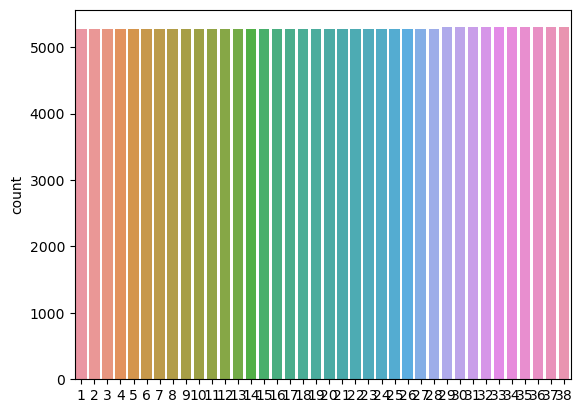

In [ ]:
sns.countplot(x=y_train[:,0])


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [ ]:
y_train = y_train-1
y_test = y_test-1
y_val = y_val-1

In [ ]:
total_classes = len(np.unique(y_train))


In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [ ]:
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)
y_val = to_categorical(y_val, total_classes)

In [ ]:
print("Training x size:",x_train.shape)
print("Testing x size:",x_test.shape)
print("val x size:",x_val.shape)
print("Training y size:",y_train.shape)
print("Testing y size:",y_test.shape)
print("val y size:",y_val.shape)

Training x size: (200839, 32, 32)
Testing x size: (11679, 32, 32)
val x size: (25480, 32, 32)
Training y size: (200839, 38)
Testing y size: (11679, 38)
val y size: (25480, 38)


In [ ]:
x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])
x_val = x_val.reshape([-1, 32, 32, 1])

In [ ]:
both_classes = {0: 'ا', 1: 'ب', 2: 'ت', 3: 'ث', 4: 'ج', 5: 'ح', 6: 'خ', 7: 'د', 8: 'ذ', 9: 'ر',
                  10: 'ز',11: 'س', 12: 'ش', 13: 'ص', 14: 'ض', 15: 'ط', 16: 'ظ',17: 'ع', 18: 'غ',
                  19: 'ف', 20: 'ق', 21: 'ك', 22: 'ل',23: 'م', 24: 'ن', 25: 'ه', 26: 'و', 27: 'ى',
                  28:'0',29:'1',30:'2',31:'3',32:'4',33:'5',34:'6',35:'7',36:'8',37:'9'}

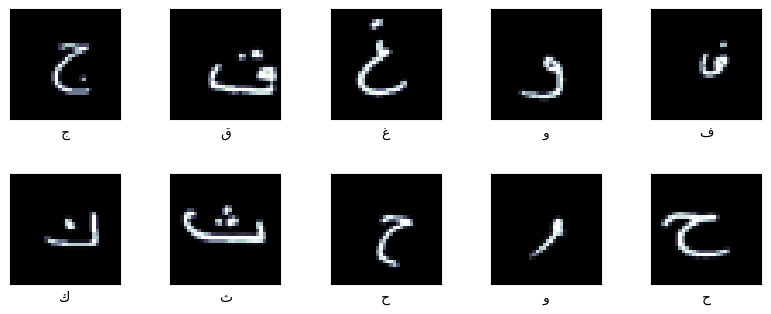

In [ ]:
ra = np.random.randint(0, x_train.shape[0], size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_train[ra[i]]==1)[0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

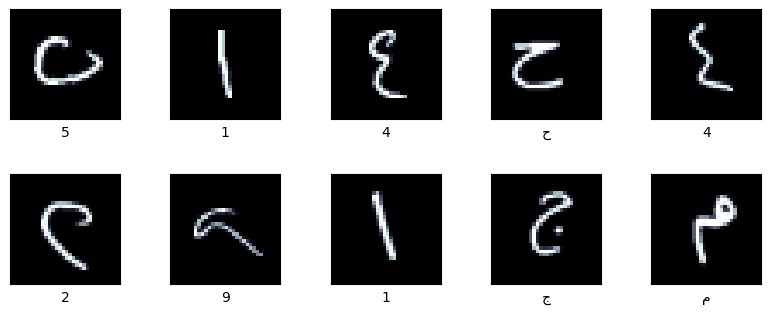

In [ ]:
  ra = np.random.randint(0, 1680, size=25)
  plt.figure(figsize=(10, 10))
  for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_test[ra[i]]==1)[0])], fontsize=10, color='black')
    plt.subplots_adjust(hspace=0.5)
  plt.show()

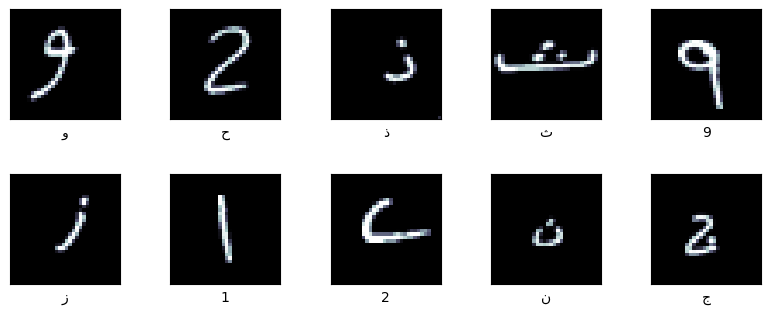

In [ ]:
  ra = np.random.randint(0, x_val.shape[0], size=25)
  plt.figure(figsize=(10, 10))
  for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_val[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_val[ra[i]]==1)[0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
  plt.show()

In [ ]:
model1 = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
])

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
image_generator = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                      samplewise_center=False,  # set each sample mean to 0
                                      featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                      samplewise_std_normalization=False,  # divide each input by its std
                                      zca_whitening=False,  # apply ZCA whitening
                                      rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                      zoom_range = 0.1, # Randomly zoom image
                                      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                      height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                      horizontal_flip=False,  # randomly flip images
                                      vertical_flip=False)
image_generator.fit(x_train)

val_image_generator = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                      samplewise_center=False,  # set each sample mean to 0
                                      featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                      samplewise_std_normalization=False,  # divide each input by its std
                                      zca_whitening=False,  # apply ZCA whitening
                                      rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                      zoom_range = 0.1, # Randomly zoom image
                                      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                      height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                      horizontal_flip=False,  # randomly flip images
                                      vertical_flip=False)
val_image_generator.fit(x_val)

In [ ]:
filepath="./train/both-bigger-aug-weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=15,
                               verbose=0,
                               mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=1e-4,patience=5, min_lr=0.0)

callbacks_list = [early_stopping, checkpoint, reduce_lr]

In [ ]:
batch_size = 128

history = model1.fit(image_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]/batch_size,
                    epochs=100,
                    verbose=1,
                    callbacks=callbacks_list,
                    validation_data=val_image_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]/batch_size)

Epoch 1/100
1569/1569 [============================>.] - ETA: 0s - loss: 0.5687 - accuracy: 0.8154
Epoch 1: val_accuracy improved from -inf to 0.93081, saving model to ./train/both-bigger-aug-weights-improvement-01-0.93.hdf5
1569/1569 [==============================] - 81s 50ms/step - loss: 0.5685 - accuracy: 0.8154 - val_loss: 0.2153 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 2/100
1570/1569 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9458
Epoch 2: val_accuracy improved from 0.93081 to 0.95389, saving model to ./train/both-bigger-aug-weights-improvement-02-0.95.hdf5
1569/1569 [==============================] - 78s 50ms/step - loss: 0.1638 - accuracy: 0.9458 - val_loss: 0.1547 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 3/100
1570/1569 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9639
Epoch 3: val_accuracy improved from 0.95389 to 0.95973, saving model to ./train/both-bigger-aug-weights-improvement-03-0.96.hdf5
1569/1569 [============

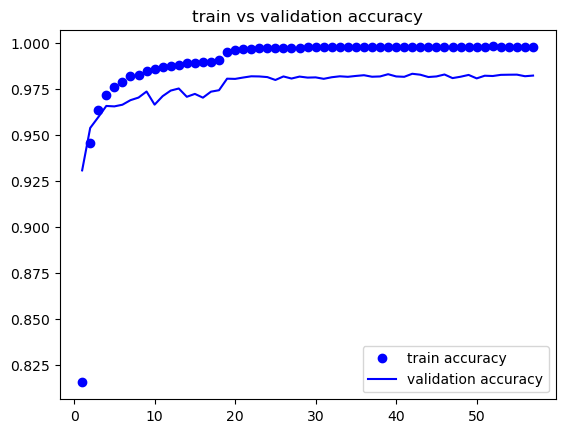

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label = "train accuracy")
plt.plot(epochs, val_acc, "b", label = "validation accuracy")
plt.title("train vs validation accuracy")
plt.legend()
plt.figure()
plt.show()

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_model = converter.convert()

# Save the model.
with open('./converted_both_model_99.06.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
ls

In [ ]:
model1.load_weights("/kaggle/working/train/both-bigger-aug-weights-improvement-48-0.98.hdf5")

In [ ]:
model1.save('./model_ar_last_bigger_99.06')

In [ ]:
ls

__notebook_source__.ipynb          model_ar_last_bigger_both_99.06/
converted_both_model.tflite        model_ar_last_bigger_both_99.06.hdf5
converted_both_model_99.06.tflite  state.db
model_ar_last_bigger_99.06/        train/


In [ ]:
score1 = model1.evaluate(x_test, y_test, verbose=1)


365/365 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9906


In [ ]:
prdicted_labels_model1 = model1.predict(x_test)

365/365 [==============================] - 1s 2ms/step


In [ ]:
predicted_max_prob_model1 = np.argmax(prdicted_labels_model1, axis=1)
real_labels_index_model1 = np.argmax(y_test, axis=1)

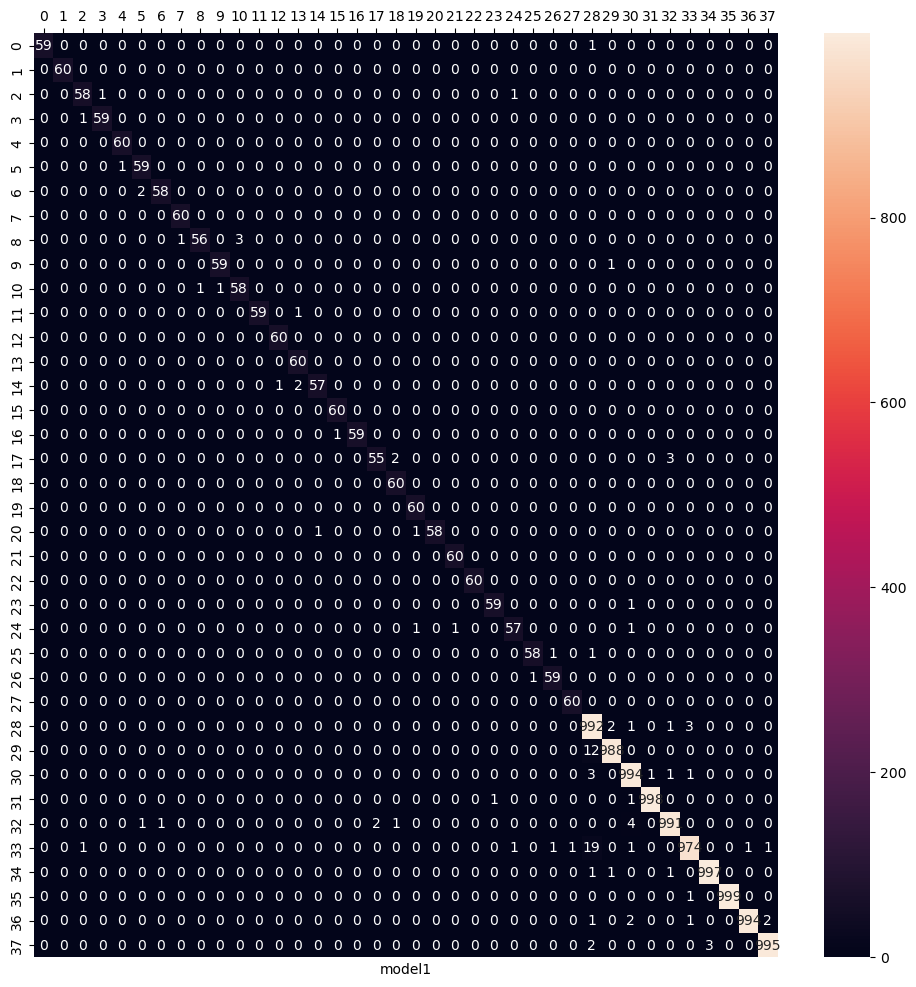

In [ ]:
cm = confusion_matrix(real_labels_index_model1, predicted_max_prob_model1)
plt.figure(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt="d")
ax.set(xlabel="model1")
ax.xaxis.tick_top()

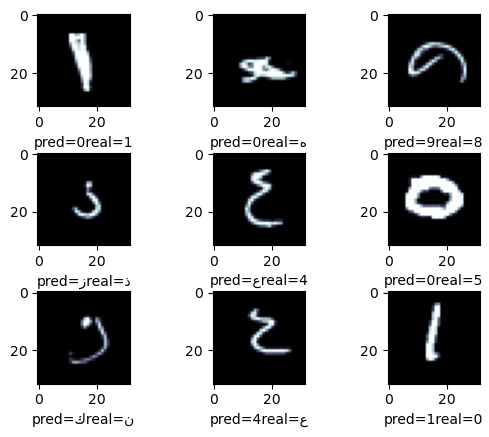

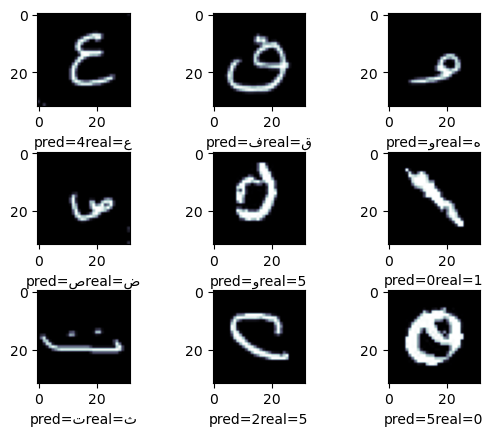

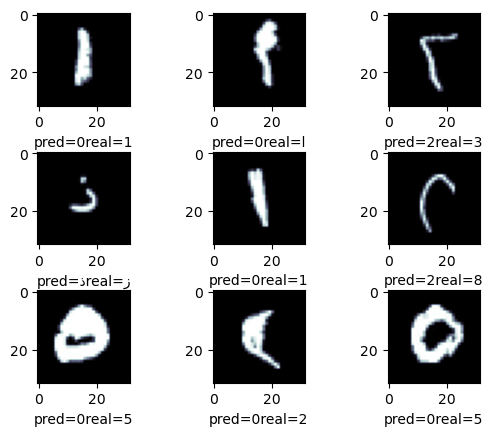

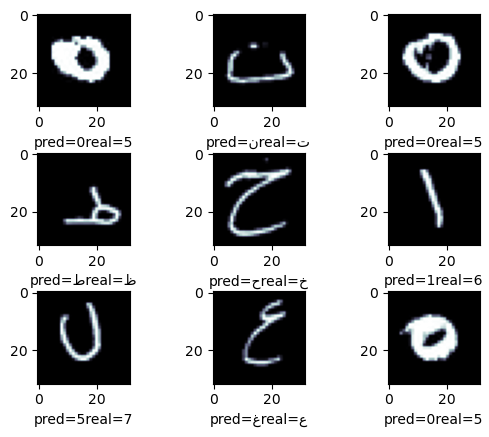

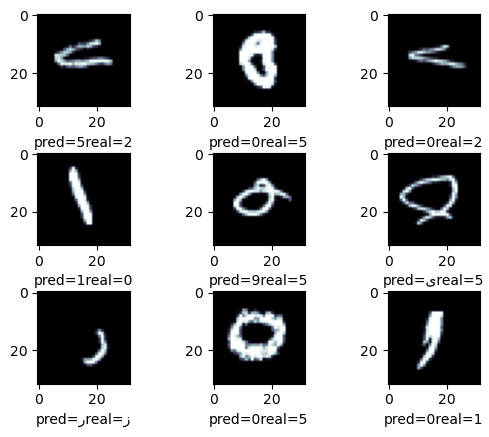

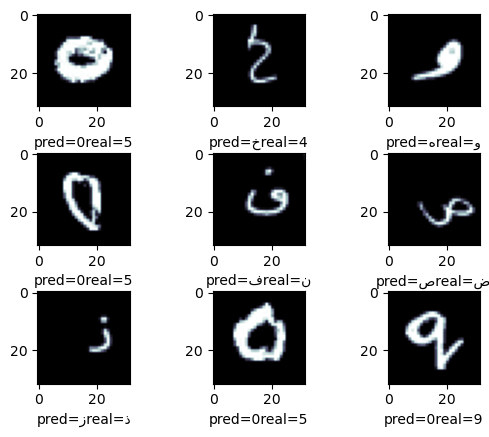

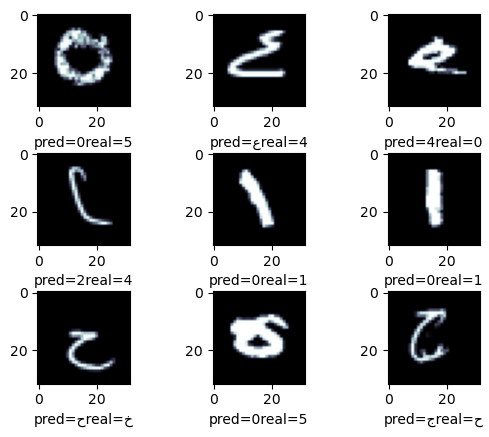

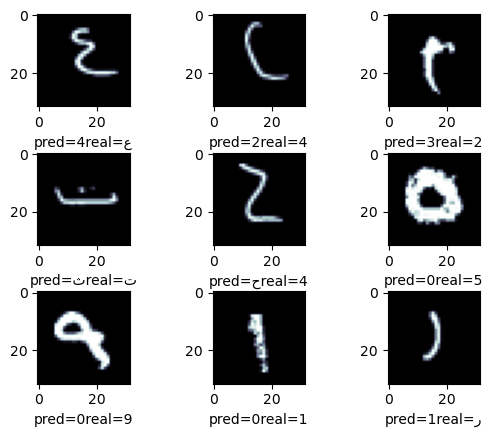

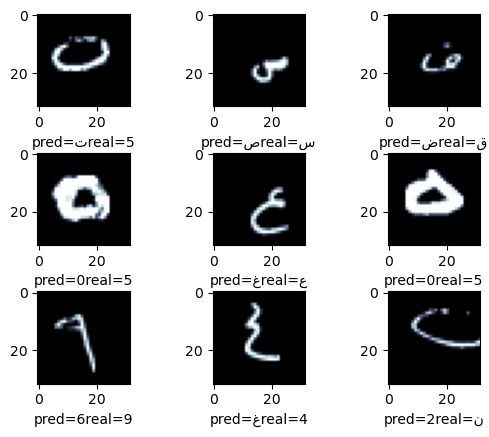

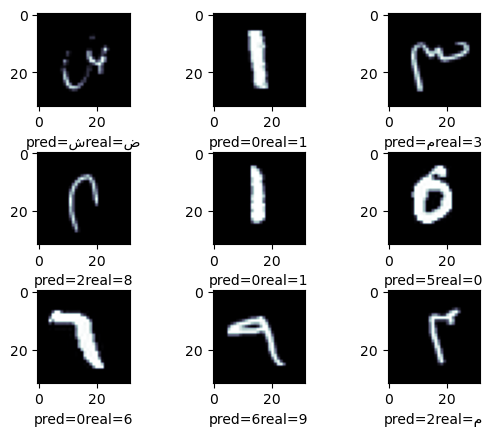

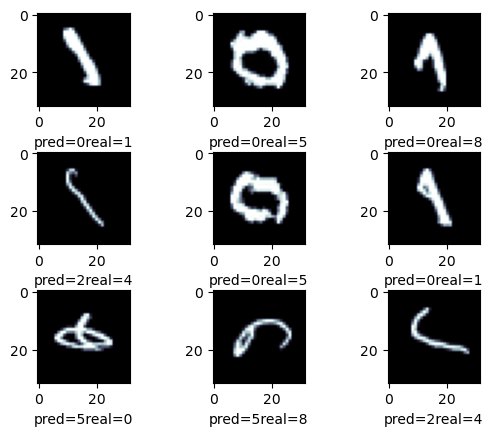

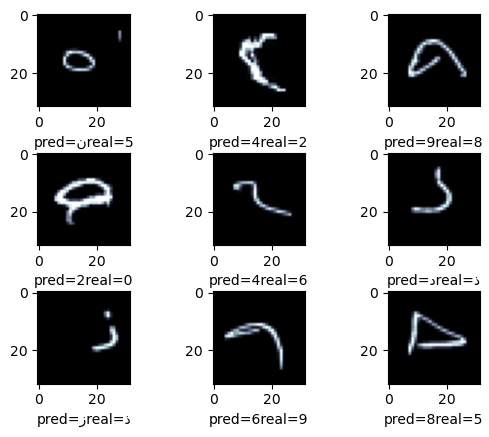

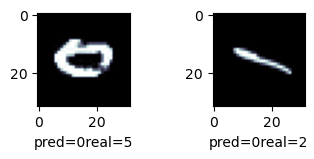

In [ ]:
i=0
for wrong_prediction in np.where(predicted_max_prob_model1!=real_labels_index_model1)[0]:
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[wrong_prediction],cmap='bone')

    plt.xlabel( "pred=" + both_classes[predicted_max_prob_model1[wrong_prediction]]+
               "real=" + both_classes[real_labels_index_model1[wrong_prediction]],
               fontsize=10,
               ha='center')
    plt.subplots_adjust(hspace=0.5)
    i=i+1
    if(i==9):
      i=0
      plt.show()